<a href="https://colab.research.google.com/github/runo313/runo313/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Adjust the path below to the location of your files in Google Drive
path_to_climate_data = '/content/drive/My Drive/BCclimetdats.xlsx'
path_to_biomass_data = '/content/drive/My Drive/netbiomasschangeinwesternCanadian.xlsx'

climate_data = pd.read_excel(path_to_climate_data)
biomass_data = pd.read_excel(path_to_biomass_data)

# Verify by displaying the first few rows of the datasets
print(climate_data.head())
print(biomass_data.head())


   Longitude (x)  Latitude (y)    Station Name  Climate ID Date/Time  Year  \
0         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   
1         -121.3         51.65  100 MILE HOUSE     1165791   1970-07  1970   
2         -121.3         51.65  100 MILE HOUSE     1165791   1970-08  1970   
3         -121.3         51.65  100 MILE HOUSE     1165791   1970-09  1970   
4         -121.3         51.65  100 MILE HOUSE     1165791   1970-10  1970   

   Month  Mean Max Temp (°C)  Mean Min Temp (°C)  Mean Temp (°C)  \
0      6                23.2                 6.6            14.9   
1      7                25.4                 8.4            16.9   
2      8                25.4                 5.9            15.7   
3      9                15.5                 2.3             8.9   
4     10                10.5                -1.6             4.5   

   Extr Max Temp (°C)  Extr Min Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
0                32.2                -1.1  

In [ ]:
climate_data['Year'] = climate_data['Year'].astype(int)
biomass_data['Year'] = biomass_data['Year'].astype(int)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets (assuming paths are correct and they're loaded into climate_data and biomass_data)
climate_data['Year'] = climate_data['Year'].astype(int)  # Convert 'Year' column to integer
biomass_data['Year'] = biomass_data['Year'].astype(int)  # Convert 'Year' column to integer

# Merge the datasets on 'Year' only
data = pd.merge(climate_data, biomass_data, on='Year', how='inner')

# Output to check the number of rows merged
print("Number of rows in merged data:", data.shape[0])
print(data.head())

# Proceed with data preparation
if not data.empty:
    # Separate features and target variable, including latitude and longitude from both datasets as separate features
    X = data[['Longitude (x)', 'Latitude (y)', 'Mean Max Temp (°C)', 'Mean Min Temp (°C)',
               'Mean Temp (°C)', 'Total Rain (mm)', 'Total Precip (mm)', 'Lat', 'Long', 'Ele', 'ForestType',
               'AGB', 'AGBM', 'MAT', 'AP', 'CMI']]
    y = data['Finbiomass']

    # Increase the training data size by adjusting the test_size parameter
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    print("\nTraining Features:")
    print(X_train.head())
    print("\nTraining Target:")
    print(y_train.head())
else:
    print("Error: No data resulted from the merge. Check key columns and their values.")

Number of rows in merged data: 24850
   Longitude (x)  Latitude (y)    Station Name  Climate ID Date/Time  Year  \
0         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   
1         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   
2         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   
3         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   
4         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   

   Month  Mean Max Temp (°C)  Mean Min Temp (°C)  Mean Temp (°C)  ...  \
0      6                23.2                 6.6            14.9  ...   
1      6                23.2                 6.6            14.9  ...   
2      6                23.2                 6.6            14.9  ...   
3      6                23.2                 6.6            14.9  ...   
4      6                23.2                 6.6            14.9  ...   

        CO21  Aridity_Nat     X1_AI         M      N   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Setup column transformer for preprocessing
column_transformer = ColumnTransformer(
    [
        ('cat', OneHotEncoder(), ['ForestType']),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), ['Longitude (x)', 'Latitude (y)', 'Mean Max Temp (°C)', 'Mean Min Temp (°C)',
             'Mean Temp (°C)', 'Total Rain (mm)', 'Total Precip (mm)', 'Lat', 'Long', 'Ele',
             'AGB', 'AGBM', 'MAT', 'AP', 'CMI'])
    ],
    remainder='passthrough'
)

# Model selection and parameter grid setup
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_features': [1.0, 'sqrt', 'log2'],  # Updated parameter grid
    'max_depth': [None, 10, 20, 30]
}

# Grid search for parameter optimization
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('grid_search', grid_search)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
predictions = pipeline.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared score: {r2:.2f}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Longitude (x)  Latitude (y)    Station Name  Climate ID Date/Time  Year  \
0         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   
1         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   
2         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   
3         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   
4         -121.3         51.65  100 MILE HOUSE     1165791   1970-06  1970   

   Month  Mean Max Temp (°C)  Mean Min Temp (°C)  Mean Temp (°C)  ...  \
0      6                23.2                 6.6            14.9  ...   
1      6                23.2                 6.6            14.9  ...   
2      6                23.2                 6.6            14.9  ...   
3      6                23.2                 6.6            14.9  ...   
4      6                23.2         

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Setup column transformer for preprocessing
column_transformer = ColumnTransformer(
    [
        ('cat', OneHotEncoder(), ['ForestType']),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), ['Longitude (x)', 'Latitude (y)', 'Mean Max Temp (°C)', 'Mean Min Temp (°C)',
             'Mean Temp (°C)', 'Total Rain (mm)', 'Total Precip (mm)', 'Lat', 'Long', 'Ele',
             'AGB', 'AGBM', 'MAT', 'AP', 'CMI'])
    ],
    remainder='passthrough'
)

# Model setup
model = RandomForestRegressor(n_estimators=200, max_features=1.0, max_depth=30, random_state=42)
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('model', model)
])

# Perform cross-validation
cv_r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
cv_mse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

print("Average R-squared from CV:", cv_r2_scores.mean())
print("Average MSE from CV:", -cv_mse_scores.mean())

# Optionally, print detailed scores
print("All R-squared scores from CV:", cv_r2_scores)
print("All MSE scores from CV:", -cv_mse_scores)


Average R-squared from CV: 0.6058528226513339
Average MSE from CV: 956.5516304821243
All R-squared scores from CV: [0.52872376 0.56173225 0.73685308 0.61695699 0.58499804]
All MSE scores from CV: [ 904.97371035  850.5015362   751.77468813 1044.49932977 1231.00888795]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score

# Define a more extensive parameter grid
rf_params = {
    'model__n_estimators': [200, 300],
    'model__max_features': [0.5, 'sqrt'],
    'model__max_depth': [None, 20, 30],
    'model__min_samples_split': [2, 5]
}

gb_params = {
    'model__n_estimators': [200, 300],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5]
}

# Random Forest Model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Gradient Boosting Model
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Grid Search Setup
rf_grid_search = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='r2')
gb_grid_search = GridSearchCV(gb_pipeline, gb_params, cv=5, scoring='r2')

# Fit the models
rf_grid_search.fit(X, y)
gb_grid_search.fit(X, y)

# Results
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

# Print the best parameters and scores
print("Random Forest Best Params:", rf_best_params)
print("Random Forest Best R2 Score:", rf_best_score)
print("Gradient Boosting Best Params:", gb_best_params)
print("Gradient Boosting Best R2 Score:", gb_best_score)


Random Forest Best Params: {'model__max_depth': None, 'model__max_features': 0.5, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Random Forest Best R2 Score: 0.652839580156635
Gradient Boosting Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Gradient Boosting Best R2 Score: 0.631915893918651


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Define the XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Parameter grid for XGBoost
xgb_params = {
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1]
}

# Grid Search to find the best parameters
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_params, cv=5, scoring='r2')
xgb_grid_search.fit(X_train, y_train)

# Best parameters and scores
print("Best parameters:", xgb_grid_search.best_params_)
print("Best R2 score:", xgb_grid_search.best_score_)

# Evaluating on the test set
xgb_best = xgb_grid_search.best_estimator_
predictions = xgb_best.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'Test R2 score: {r2:.3f}')
print(f'Test MSE: {mse:.3f}')


Best parameters: {'xgb__colsample_bytree': 1, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
Best R2 score: 0.9872678211973606
Test R2 score: 0.987
Test MSE: 32.780


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-rmse:45.44822	train-rmse:45.76679
[1]	eval-rmse:41.05793	train-rmse:41.34697
[2]	eval-rmse:37.10469	train-rmse:37.35574
[3]	eval-rmse:33.55492	train-rmse:33.77178
[4]	eval-rmse:30.35268	train-rmse:30.54402
[5]	eval-rmse:27.45218	train-rmse:27.62228
[6]	eval-rmse:24.86073	train-rmse:24.99647
[7]	eval-rmse:22.49283	train-rmse:22.60148
[8]	eval-rmse:20.35292	train-rmse:20.44994
[9]	eval-rmse:18.42006	train-rmse:18.51271
[10]	eval-rmse:16.68343	train-rmse:16.75801
[11]	eval-rmse:15.12104	train-rmse:15.18212
[12]	eval-rmse:13.69949	train-rmse:13.75077
[13]	eval-rmse:12.42548	train-rmse:12.46083
[14]	eval-rmse:11.27208	train-rmse:11.30235
[15]	eval-rmse:10.22418	train-rmse:10.24831
[16]	eval-rmse:9.28716	train-rmse:9.29695
[17]	eval-rmse:8.43786	train-rmse:8.43964
[18]	eval-rmse:7.67223	train-rmse:7.67206
[19]	eval-rmse:6.98109	train-rmse:6.97176
[20]	eval-rmse:6.36258	train-rmse:6.34186
[21]	eval-rmse:5.79829	train-rmse:5.77261
[22]	eval-rmse:5.28674	train-rmse:5.25697
[23]	eval-rm

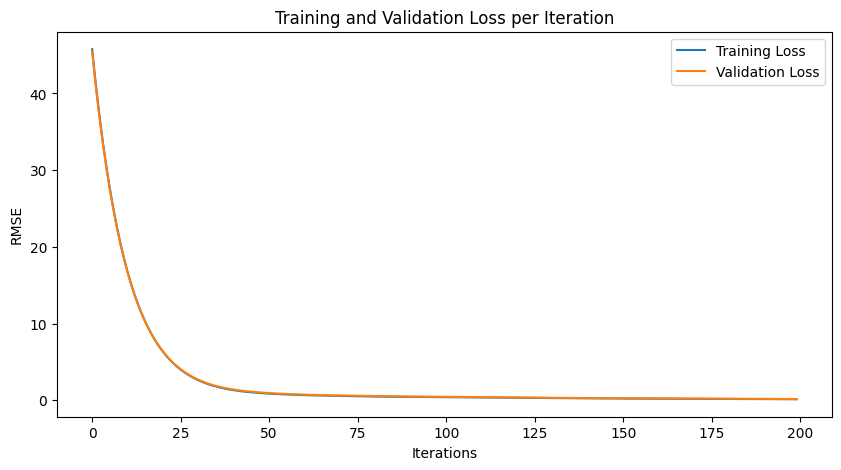

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming you've already loaded your data into DataFrame `data`
# Let's split the data into features and target
X = data.drop('Finbiomass', axis=1)  # Assume 'Finbiomass' is the target
y = data['Finbiomass']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup the Column Transformer for preprocessing
# Numerical columns list
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Removing 'ForestType' from numerical_cols if it's mistakenly included
numerical_cols = [col for col in numerical_cols if col not in ['ForestType']]

# Categorical columns list
categorical_cols = ['ForestType']  # or X_train.select_dtypes(include=['object']).columns.tolist() if there are more

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_transformed, label=y_train)
dtest = xgb.DMatrix(X_test_transformed, label=y_test)

# Set the parameters for XGBoost
params = {
    'max_depth': 7,
    'min_child_weight': 1,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1,
    'objective': 'reg:squarederror'
}

# Specify validations set to watch performance
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 200
evals_result = {}

# Train the model
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=10, evals_result=evals_result, verbose_eval=True)

# Plotting the training and validation loss curves
training_rounds = range(len(evals_result['train']['rmse']))
plt.figure(figsize=(10, 5))
plt.plot(training_rounds, evals_result['train']['rmse'], label='Training Loss')
plt.plot(training_rounds, evals_result['eval']['rmse'], label='Validation Loss')
plt.title('Training and Validation Loss per Iteration')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Predictions shape:", predictions.shape)


X_test shape: (4970, 73)
y_test shape: (4970,)
Predictions shape: (2485,)


Best parameters: {'xgb__colsample_bytree': 1, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
Best R2 score: 0.9999871180164985
Test R2 score: 1.000
Test MSE: 0.029
Mean Absolute Error: 0.13
Root Mean Squared Error: 0.17


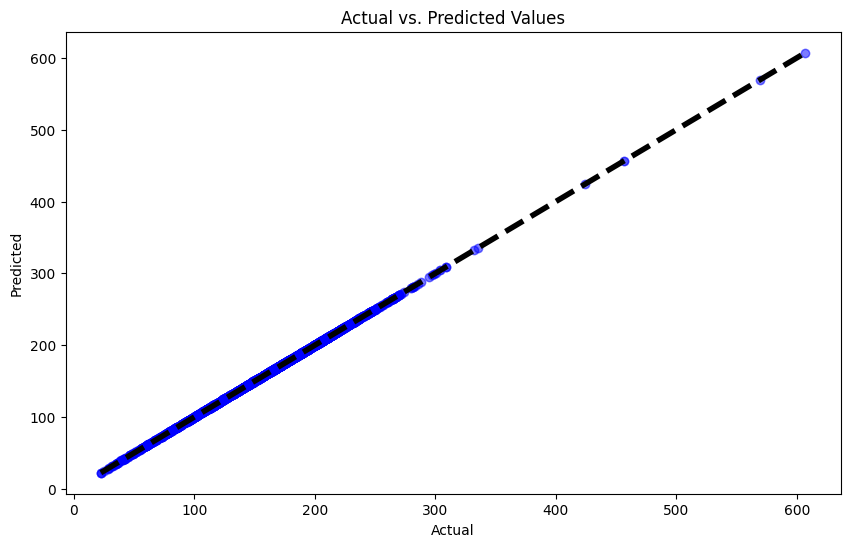

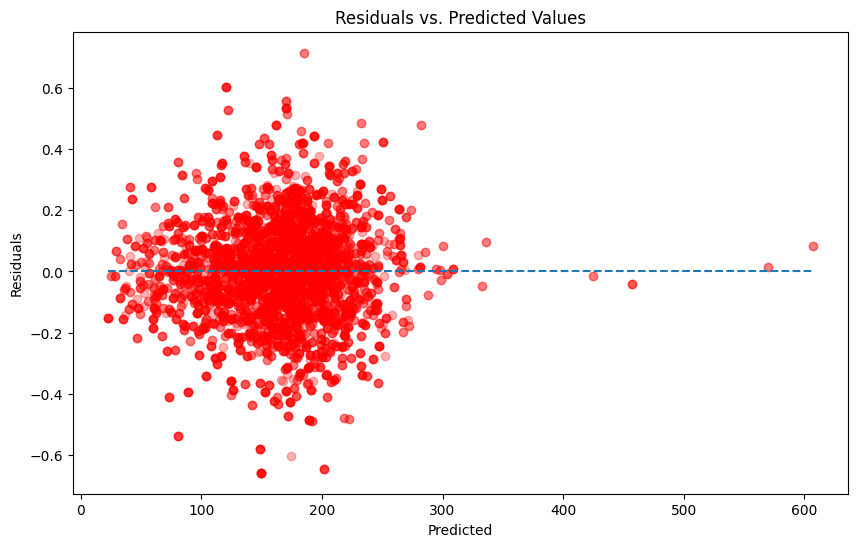

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define the XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Make sure 'preprocessor' is already defined as a ColumnTransformer
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Parameter grid for XGBoost
xgb_params = {
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1]
}

# Grid Search to find the best parameters
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_params, cv=5, scoring='r2')
xgb_grid_search.fit(X_train, y_train)

# Best parameters and scores
print("Best parameters:", xgb_grid_search.best_params_)
print("Best R2 score:", xgb_grid_search.best_score_)

# Evaluating on the test set
xgb_best = xgb_grid_search.best_estimator_
predictions = xgb_best.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

# Print the metrics
print(f'Test R2 score: {r2:.3f}')
print(f'Test MSE: {mse:.3f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Plotting residuals
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.3, color='red')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


Testing Mean Squared Error: 0.029
Testing Root Mean Squared Error: 0.169
Testing Mean Absolute Error: 0.130
Testing R-squared: 1.000


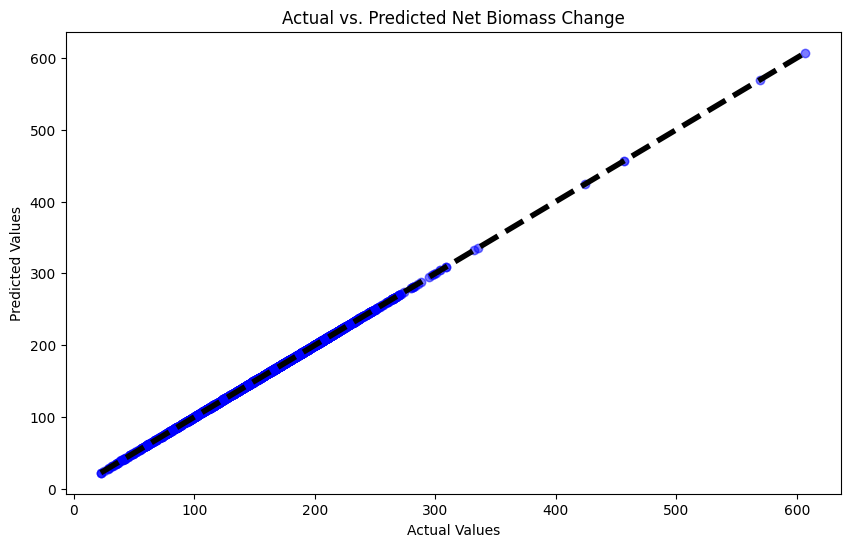

In [ ]:
# Assuming X_test and y_test contain the testing data

# Make predictions on the testing set
y_pred = xgb_best.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Testing Mean Squared Error: {mse:.3f}')
print(f'Testing Root Mean Squared Error: {rmse:.3f}')
print(f'Testing Mean Absolute Error: {mae:.3f}')
print(f'Testing R-squared: {r2:.3f}')


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Net Biomass Change')
plt.show()